2105208_MILAN KUMAR SAHOO

In [1]:

# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('/content/liver.csv')


In [3]:
# printing the first 5 rows of the dataframe
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# number of rows and columns in the dataframe
df.shape

(583, 11)

In [5]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# checking for missing values in each column
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
# getting some statistical measures about the data
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Dataset i.e output value has '1' for liver disease and '2' for no liver disease 

In [8]:
# distribution of target Variable
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [9]:
# grouping the data bas3ed on the target variable
df.groupby('Dataset').mean()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
1,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914179
2,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.029576


In [10]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION

<Axes: xlabel='Dataset', ylabel='count'>

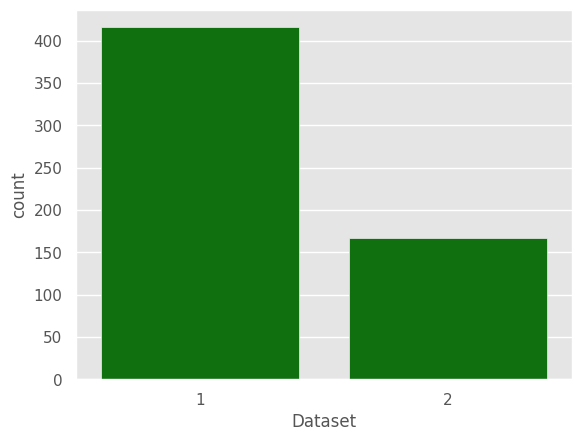

In [15]:
# target countplot
sns.countplot(x = 'Dataset',data = df,color='green')

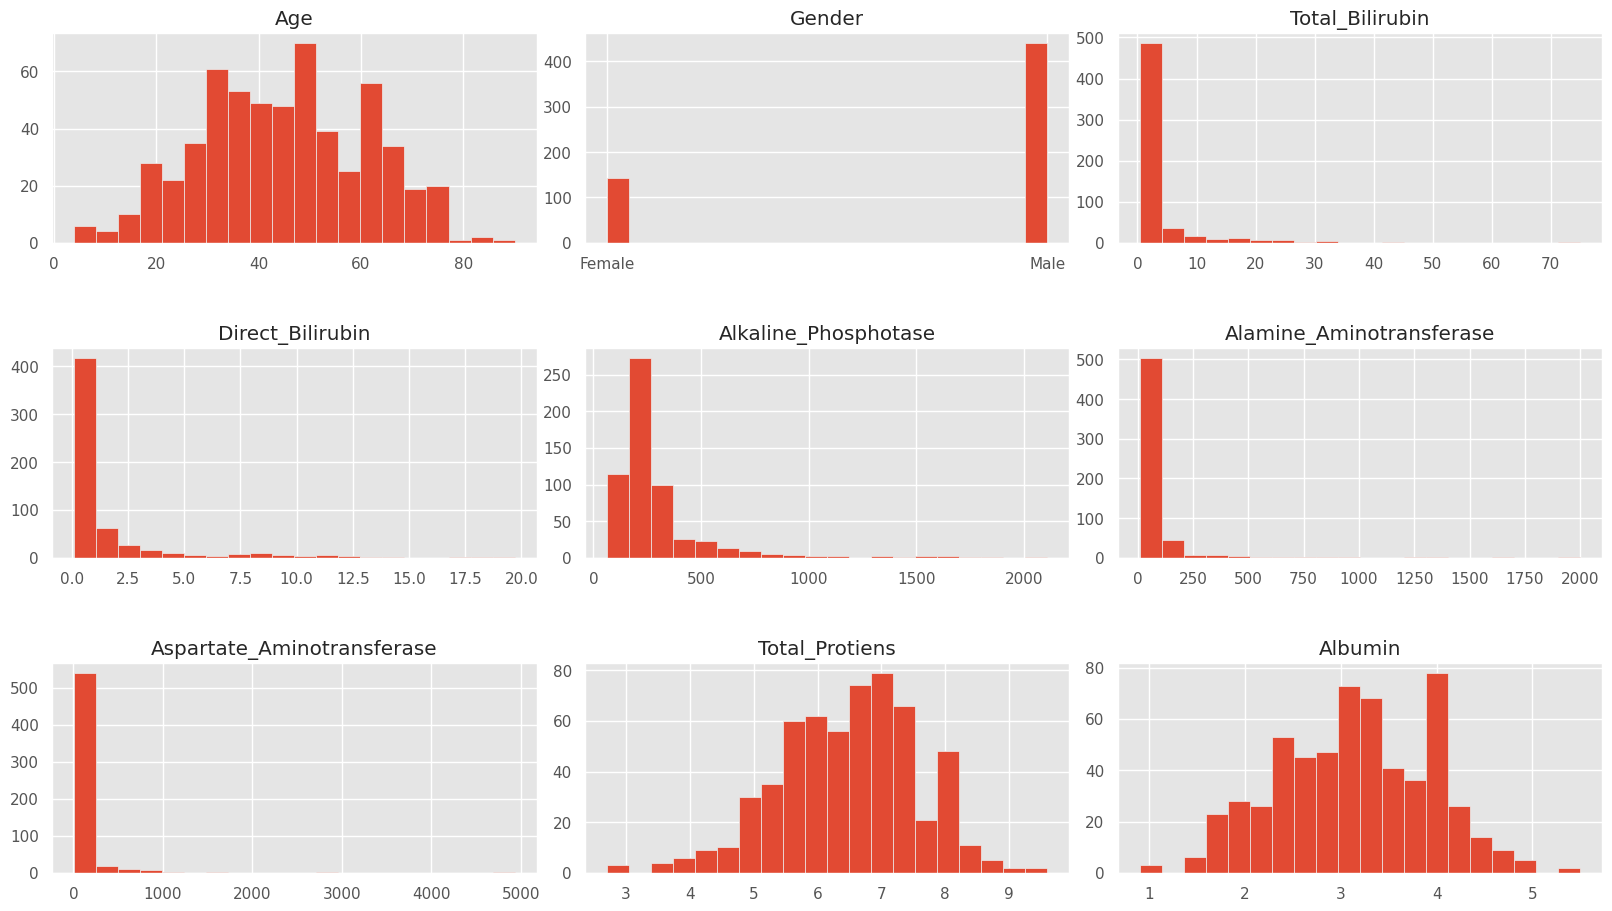

In [16]:
# Histogram of each feature
import itertools

col = df.columns[:9]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

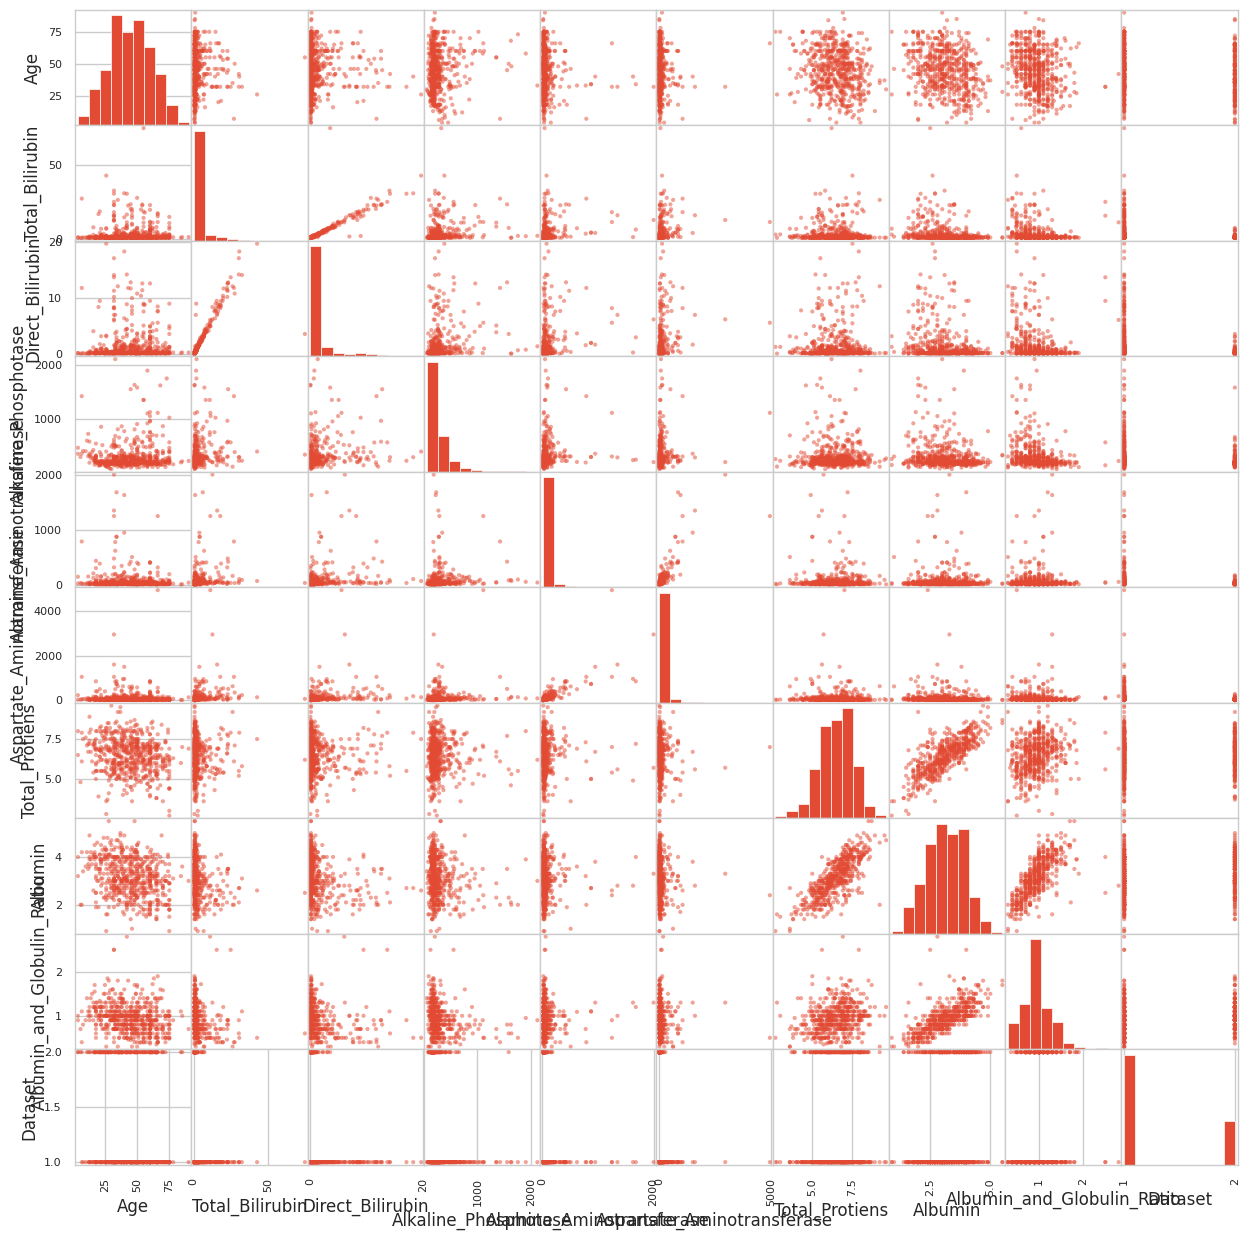

In [43]:
# Scatter plot matrix: a diagram where each value in the data set is represented by a do
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (15, 15));

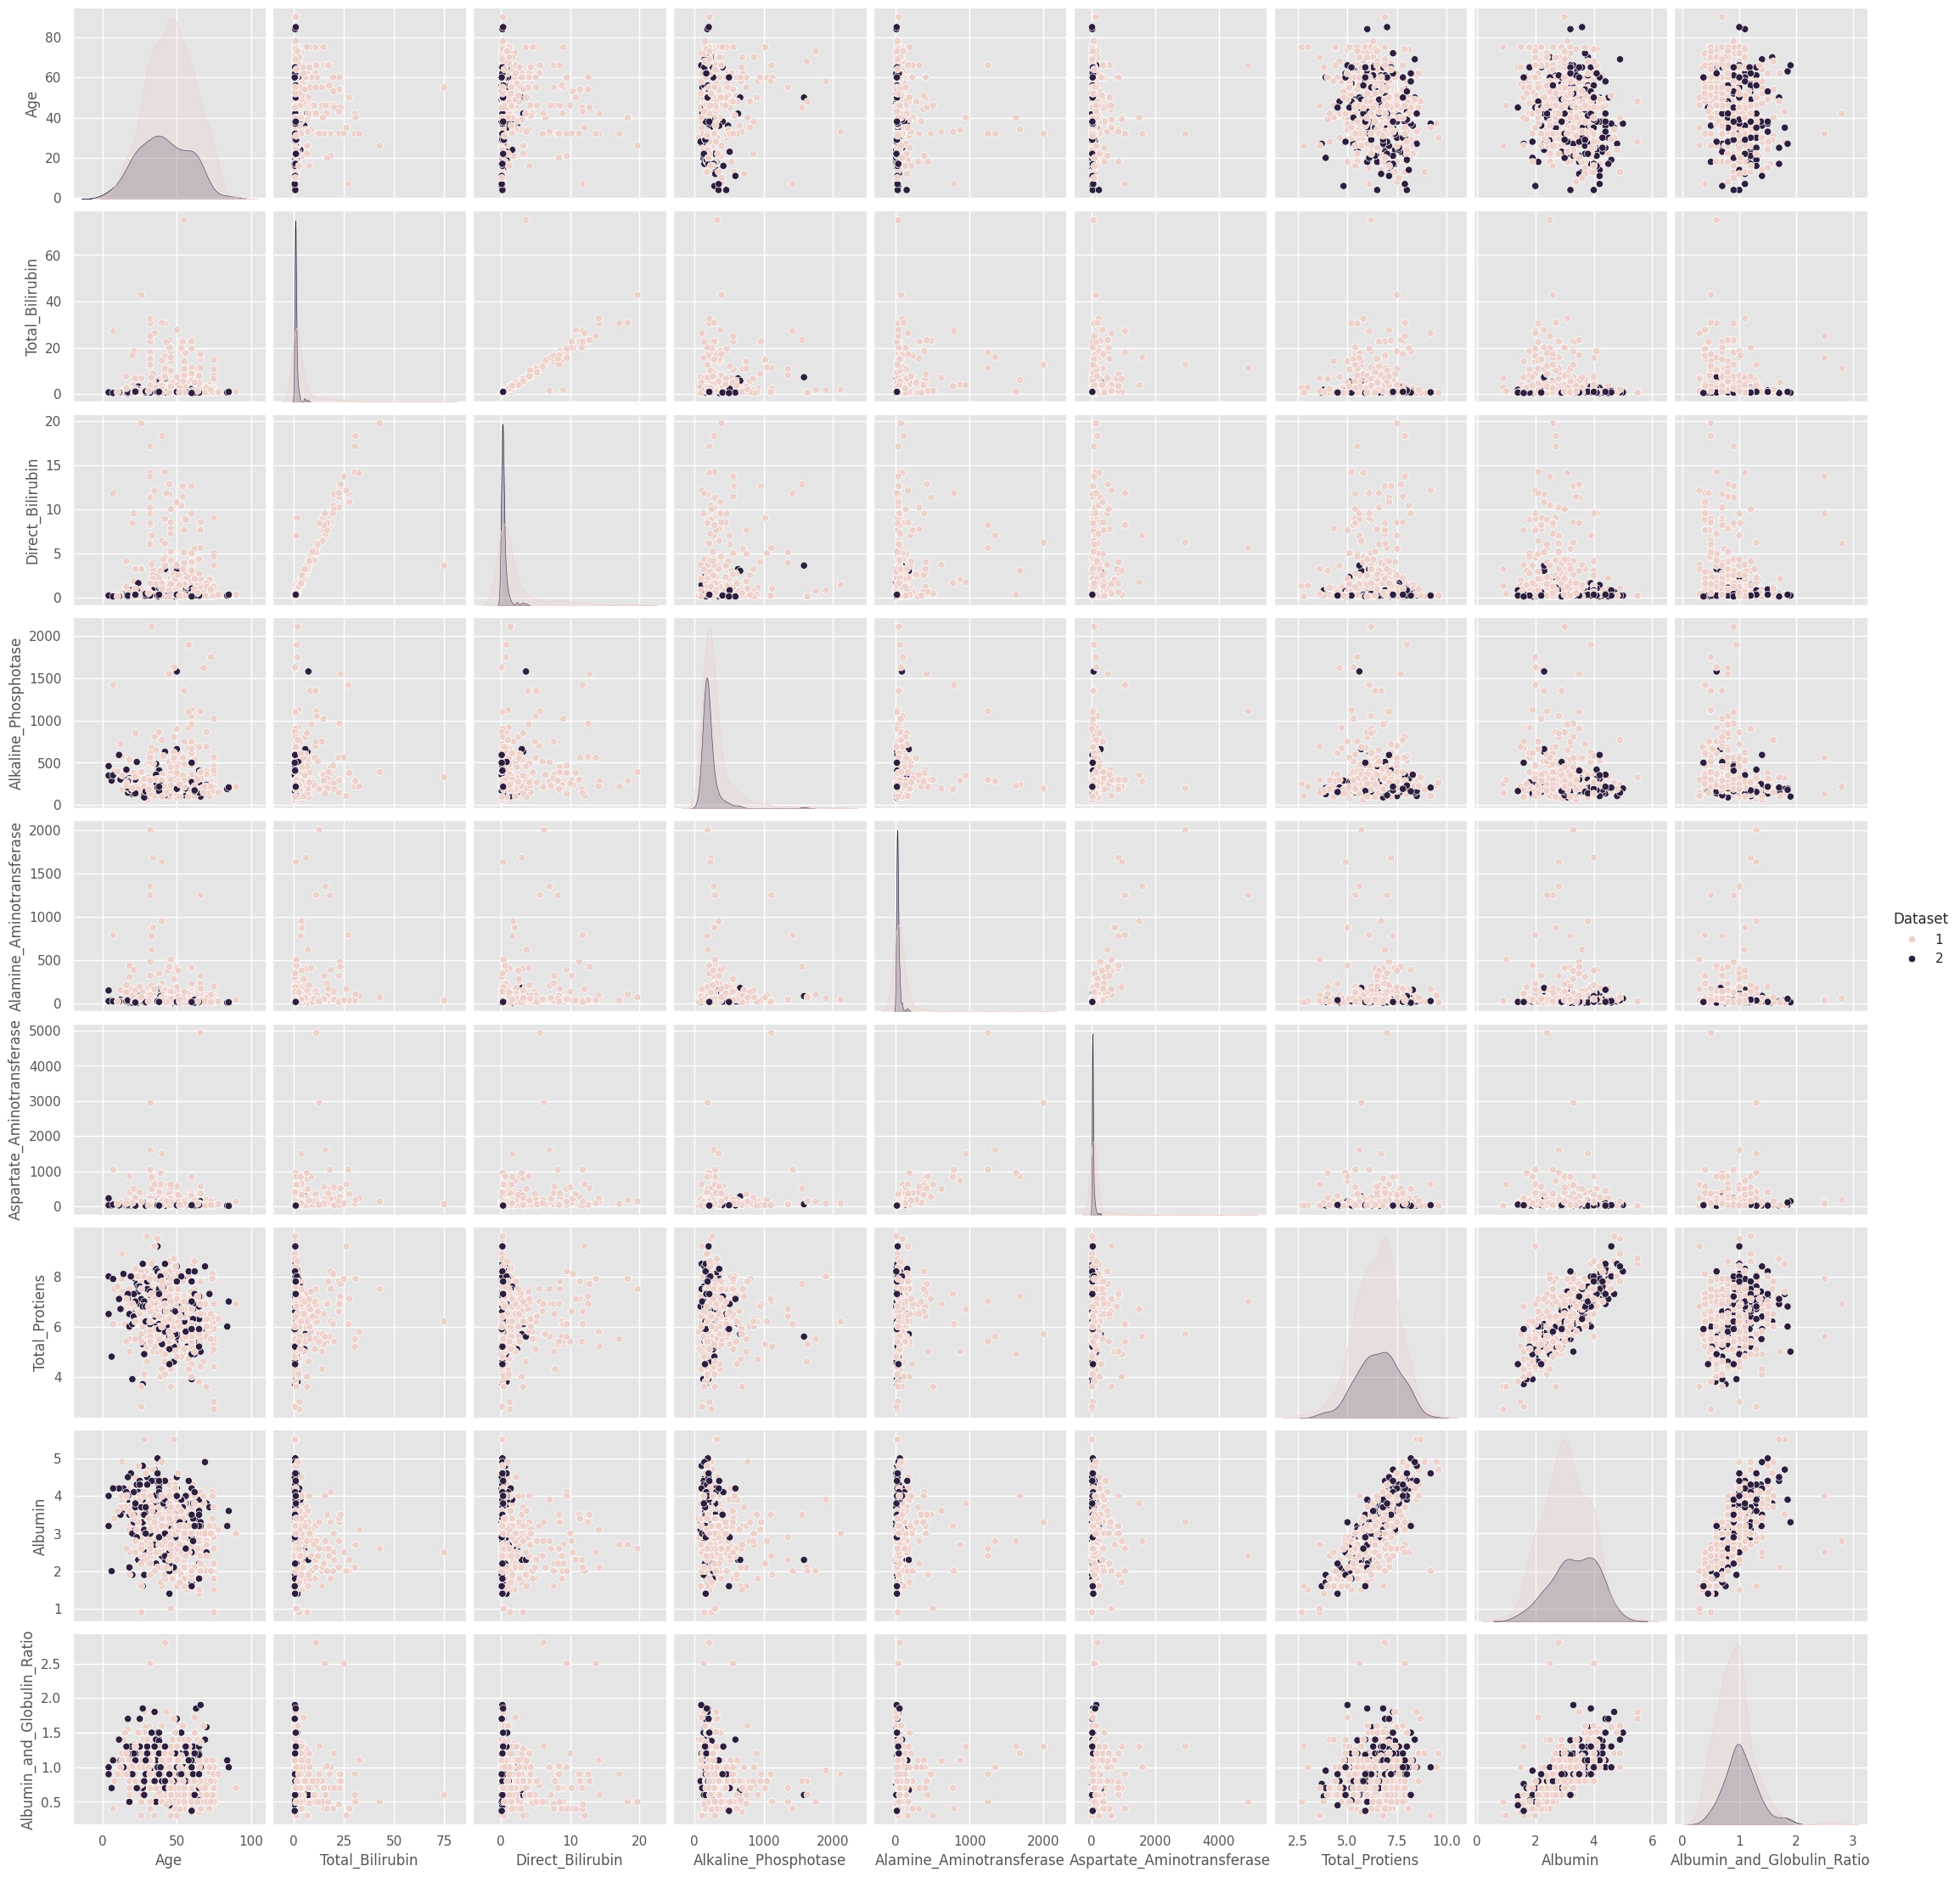

In [24]:
# Pairplot :-enables the visualization of the relationship between each pair of variables in a dataset
sns.pairplot(data = df, hue = 'Dataset')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

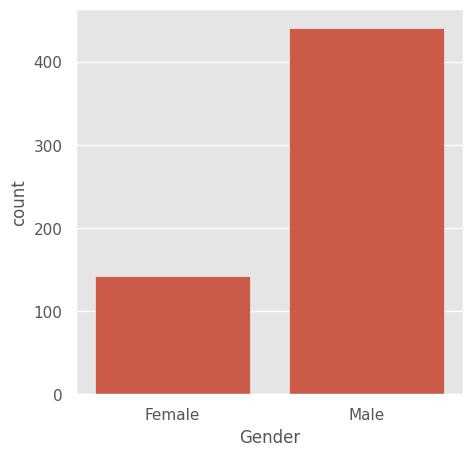

In [26]:
#gender counterplot
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df)

Number of patients that are male:  441
Number of patients that are female:  142


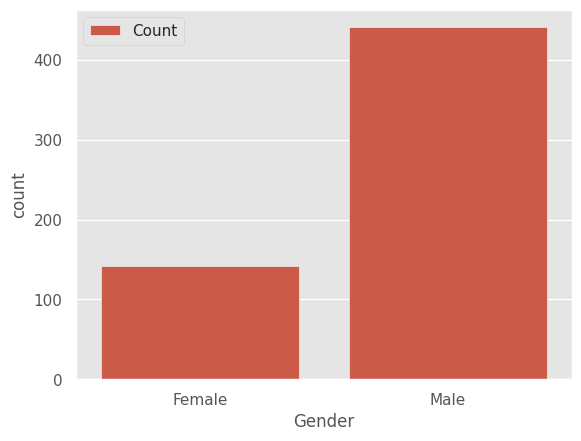

In [28]:
#Age seems to be a factor for liver disease for both male and female genders
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

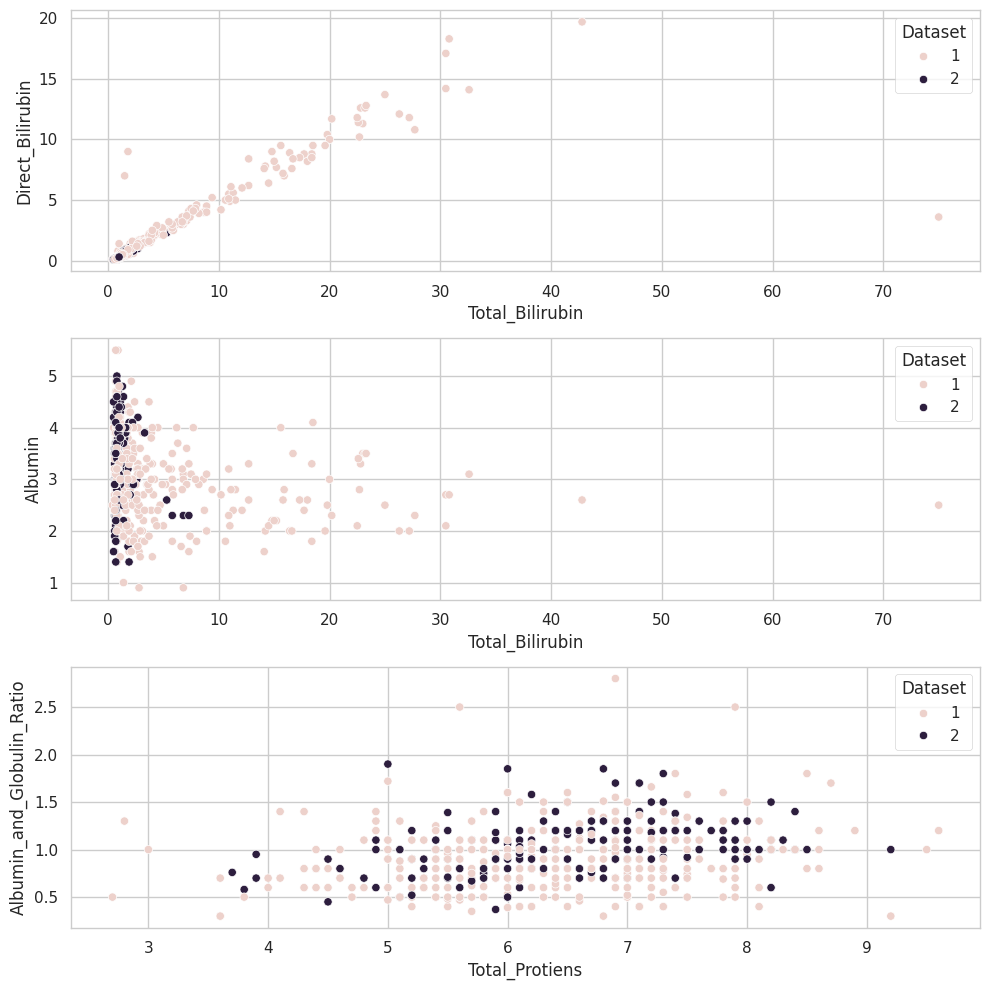

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background grid style
sns.set_style('whitegrid')

# Create the FacetGrid for each scatter plot
fig, axes = plt.subplots(3, 1, figsize=(10 ,10))

# Scatter plot for 'Total_Bilirubin' vs 'Direct_Bilirubin'
sns.scatterplot(data=df, x='Total_Bilirubin', y='Direct_Bilirubin', hue='Dataset', ax=axes[0])
axes[0].legend(title='Dataset')

# Scatter plot for 'Total_Bilirubin' vs 'Albumin'
sns.scatterplot(data=df, x='Total_Bilirubin', y='Albumin', hue='Dataset', ax=axes[1])
axes[1].legend(title='Dataset')

# Scatter plot for 'Total_Protiens' vs 'Albumin_and_Globulin_Ratio'
sns.scatterplot(data=df, x='Total_Protiens', y='Albumin_and_Globulin_Ratio', hue='Dataset', ax=axes[2])
axes[2].legend(title='Dataset')

# Show the plots
plt.tight_layout()
plt.show()


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [35]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


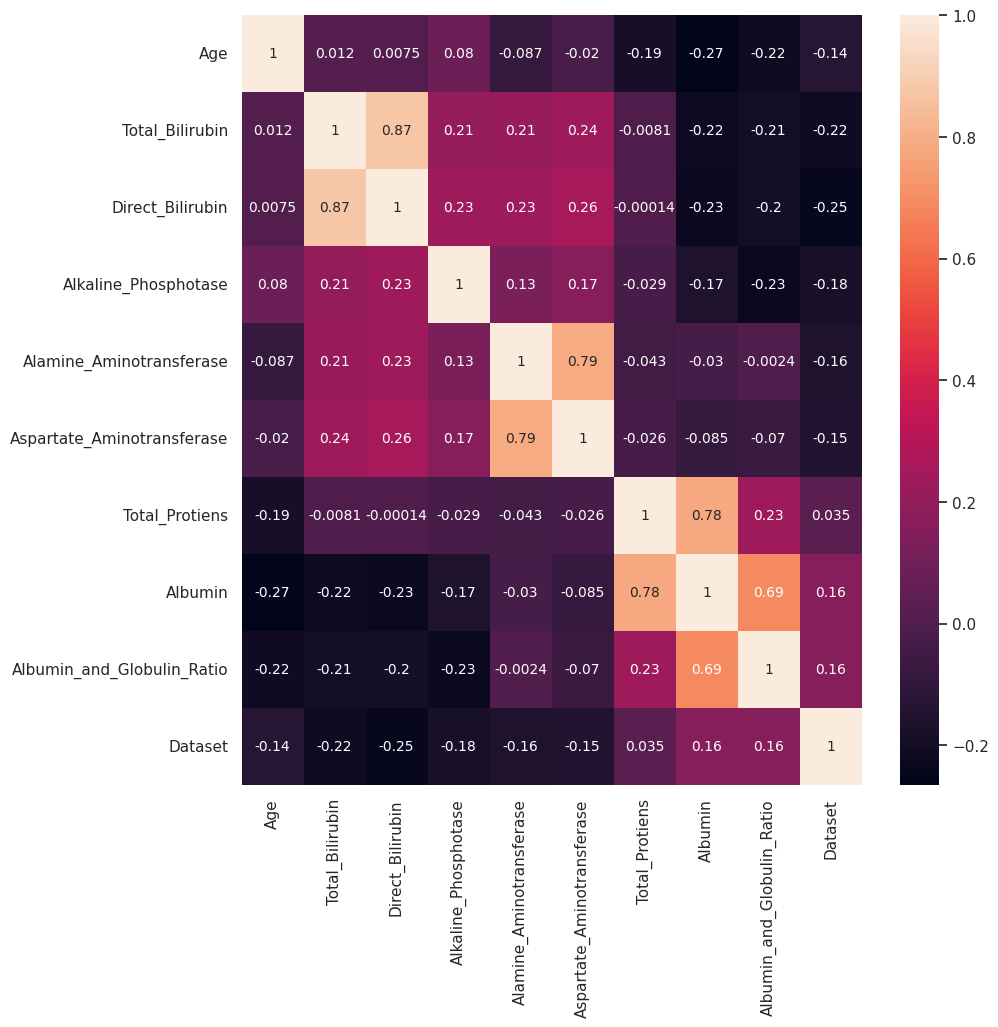

In [40]:
# Heatmap:-a two-dimensional representation of data in which various values are represented by colors.
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True,ax=ax)
plt.show()

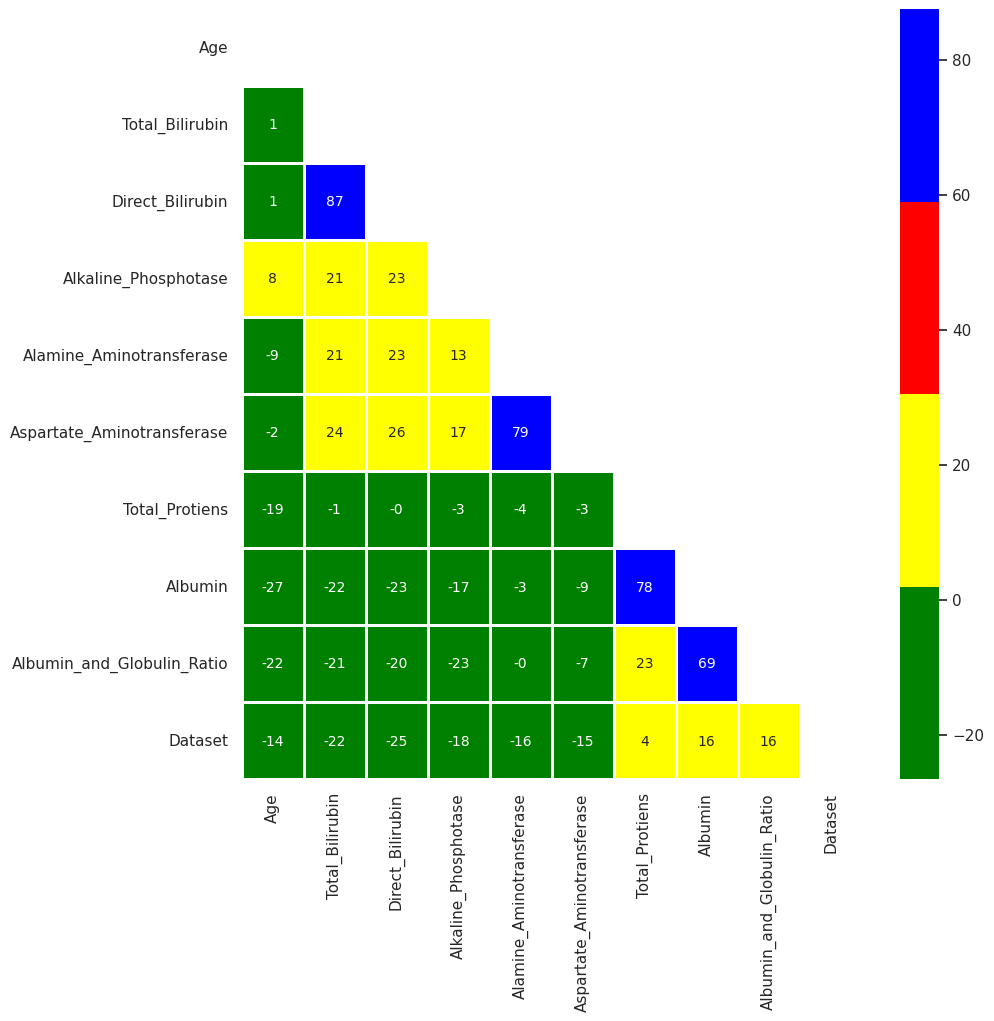

In [44]:
#Creating a Correlation Heatmap with Seaborn in Python
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

### DATA PROCESSING AND MACHINE LEARNING MODEL

In [45]:
X = df.drop('Dataset', axis=1)
Y = df['Dataset']

In [46]:
print(X)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [47]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


### Splitting the data to training data & Test data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(583, 10) (466, 10) (117, 10)


### DATA STANDARDIZATION

In [50]:
train_mean = X_train.mean()
train_std = X_train.std()

In [51]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [52]:
## Check for mean and std dev.
X_train.describe()

,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Total_Bilirubin,Total_Protiens
count,4.660000e+02,4.660000e+02,4.660000e+02,462.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02
mean,2.134678e-16,2.382453e-17,-2.363393e-16,0.000000,-4.764906e-17,5.717887e-18,5.717887e-17,-9.529811e-18,4.879263e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.508103e+00,-3.793185e-01,-2.258907e+00,-2.050590,-9.461854e-01,-3.372288e-01,-5.027424e-01,-4.637661e-01,-3.466287e+00
25%,-7.351926e-01,-3.121384e-01,-7.186305e-01,-0.793878,-4.787911e-01,-2.896925e-01,-4.673262e-01,-4.015255e-01,-6.569247e-01
50%,-1.574288e-03,-2.525635e-01,-7.684857e-02,0.085821,-3.402273e-01,-2.326489e-01,-4.319101e-01,-3.704052e-01,9.223873e-02
75%,7.931788e-01,-1.207383e-01,8.216462e-01,0.462835,2.582926e-02,-9.083238e-02,-7.774837e-02,-1.058825e-01,6.541113e-01
max,2.749494e+00,9.710382e+00,3.003705e+00,5.803862,7.520683e+00,1.525150e+01,6.438827e+00,1.114411e+01,2.901602e+00


In [53]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [54]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Total_Bilirubin,Total_Protiens
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,-0.085178,-0.103578,-0.115246,-0.087380,-0.024300,-0.102662,-0.058981,-0.063325,-0.085447
std,0.948987,0.533075,1.100848,1.021421,1.028061,0.434766,0.975909,0.819795,1.081398
min,-2.508103,-0.379319,-2.900689,-2.050590,-0.826235,-0.330891,-0.502742,-0.432646,-3.559933
25%,-0.735193,-0.313406,-0.846987,-0.793878,-0.482927,-0.289692,-0.467326,-0.401526,-0.656925
50%,-0.001574,-0.262704,-0.205205,-0.165522,-0.358840,-0.258002,-0.431910,-0.370405,-0.095052
75%,0.609774,-0.141019,0.821646,0.462835,0.005148,-0.128069,-0.219413,-0.168123,0.654111
max,1.832471,3.575439,2.233567,2.662081,5.535291,2.958620,5.943000,4.266522,2.246084


In [61]:
#remove duplicate element and null element
df = df.drop_duplicates()
print( df.shape )

(570, 11)


In [63]:
# Check for NaN values in X_train
nan_columns = X_train.columns[X_train.isnull().any()]
print(nan_columns)

Index(['Albumin_and_Globulin_Ratio', 'Gender'], dtype='object')


In [68]:
# Example of handling NaN values by imputation (replace NaN with mean)
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train
X_train = imputer.fit_transform(X_train)

X_test = imputer.fit_transform(X_test)
# Now X_train_imputed does not contain NaN values


### MODEL TRANING

## LOGISTIC REGRESSION

In [65]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [66]:
# accuracy on training data
Y_pred = lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7339055793991416


In [69]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7606837606837606



confusion matrix:
[[80  5]
 [23  9]]

classification report:
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        85
           2       0.64      0.28      0.39        32

    accuracy                           0.76       117
   macro avg       0.71      0.61      0.62       117
weighted avg       0.74      0.76      0.73       117



<Axes: >

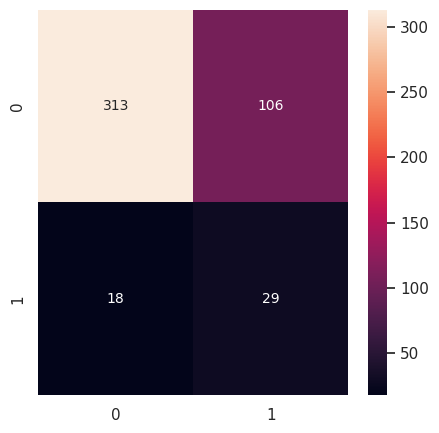

In [70]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## KNN classifier

In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [72]:
# accuracy on training data
Y_pred = knn.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8047210300429185


In [73]:
# accuracy on test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6666666666666666



confusion matrix:
[[66 19]
 [20 12]]

classification report:
              precision    recall  f1-score   support

           1       0.77      0.78      0.77        85
           2       0.39      0.38      0.38        32

    accuracy                           0.67       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.66      0.67      0.66       117



<Axes: >

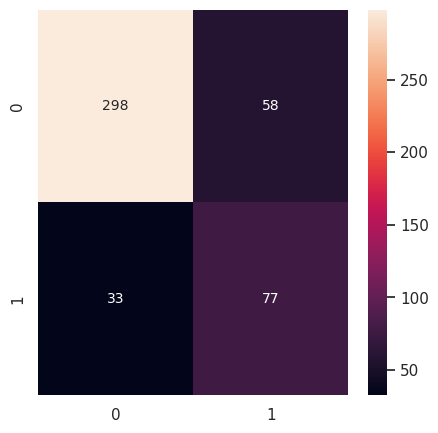

In [74]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## SVM

In [76]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [77]:
# accuracy on training data
Y_pred = svm.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.7103004291845494


In [78]:
# accuracy on test data
X_test_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7264957264957265



confusion matrix:
[[85  0]
 [32  0]]

classification report:
              precision    recall  f1-score   support

           1       0.73      1.00      0.84        85
           2       0.00      0.00      0.00        32

    accuracy                           0.73       117
   macro avg       0.36      0.50      0.42       117
weighted avg       0.53      0.73      0.61       117



<Axes: >

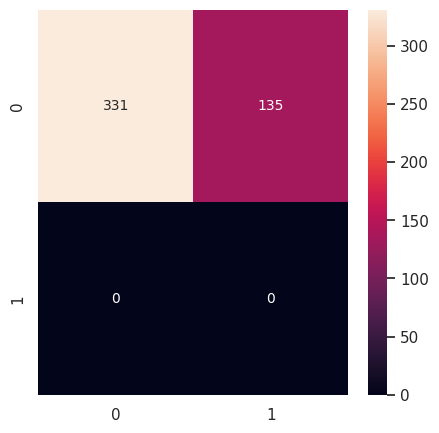

In [79]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## DECISION TREE CLASSIFIER

In [80]:
dt= DecisionTreeClassifier(criterion = 'entropy',random_state=42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [81]:
# accuracy on training data
Y_pred = dt.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [82]:
# accuracy on test data
X_test_prediction = dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6923076923076923



confusion matrix:
[[64 21]
 [15 17]]

classification report:
              precision    recall  f1-score   support

           1       0.81      0.75      0.78        85
           2       0.45      0.53      0.49        32

    accuracy                           0.69       117
   macro avg       0.63      0.64      0.63       117
weighted avg       0.71      0.69      0.70       117



<Axes: >

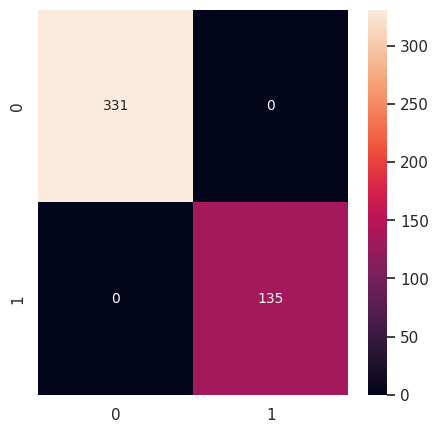

In [83]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## RANDOM FOREST CLASSIFIER

In [84]:
rft = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rft.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [85]:
# accuracy on training data
Y_pred = rft.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9914163090128756


In [86]:
# accuracy on test data
X_test_prediction = rft.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7094017094017094



confusion matrix:
[[72 13]
 [21 11]]

classification report:
              precision    recall  f1-score   support

           1       0.77      0.85      0.81        85
           2       0.46      0.34      0.39        32

    accuracy                           0.71       117
   macro avg       0.62      0.60      0.60       117
weighted avg       0.69      0.71      0.70       117



<Axes: >

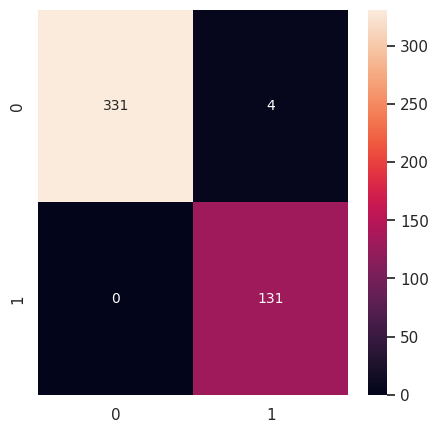

In [87]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## GAUSSIAN NAIVE BAYES

In [88]:
gnb= GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [89]:
# accuracy on training data
Y_pred = gnb.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.555793991416309


In [90]:
# accuracy on test data
X_test_prediction = gnb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.5042735042735043



confusion matrix:
[[27 58]
 [ 0 32]]

classification report:
              precision    recall  f1-score   support

           1       1.00      0.32      0.48        85
           2       0.36      1.00      0.52        32

    accuracy                           0.50       117
   macro avg       0.68      0.66      0.50       117
weighted avg       0.82      0.50      0.49       117



<Axes: >

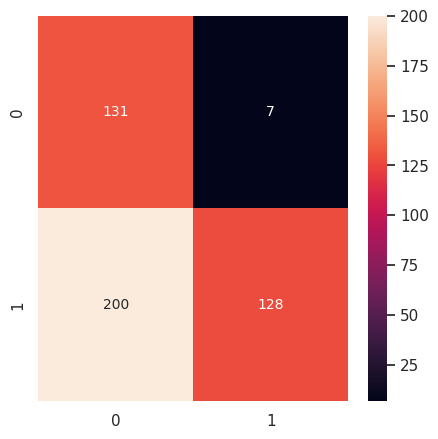

In [91]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

## GRADIENT BOOSTING CLASSIFIER

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [97]:
# accuracy on training data
Y_pred = gbc.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9420600858369099


In [98]:
# accuracy on test data
X_test_prediction = gbc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7264957264957265



confusion matrix:
[[72 13]
 [19 13]]

classification report:
              precision    recall  f1-score   support

           1       0.79      0.85      0.82        85
           2       0.50      0.41      0.45        32

    accuracy                           0.73       117
   macro avg       0.65      0.63      0.63       117
weighted avg       0.71      0.73      0.72       117



<Axes: >

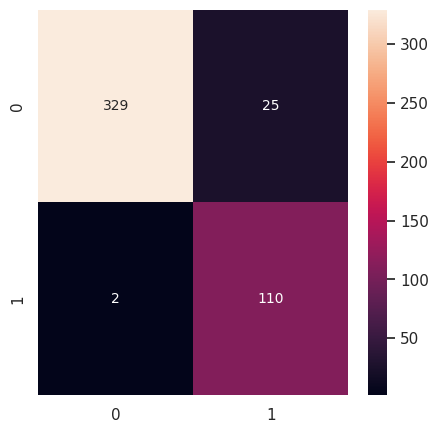

In [99]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

In [106]:
from sklearn.preprocessing import LabelEncoder

# Convert Y_test to binary labels
label_encoder = LabelEncoder()
Y_test_binary = label_encoder.fit_transform(Y_test)

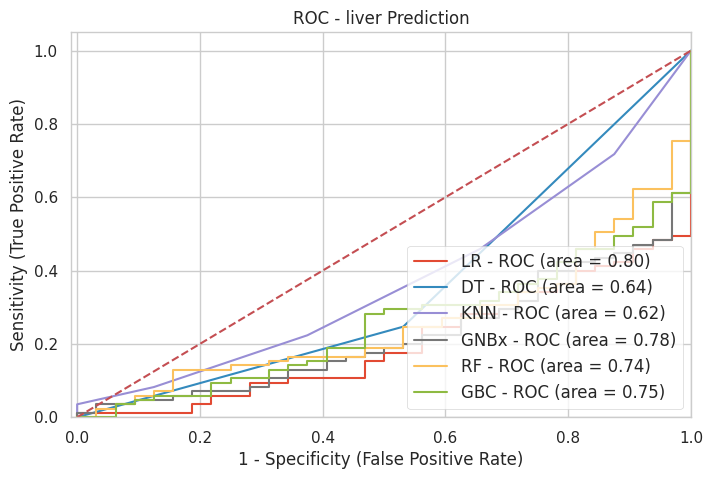

In [113]:
#ROC curve all prediction
# Plotting a graph
''' Multiclass Receiver Operating Characteristic
This example describes the use of the Receiver Operating Characteristic (ROC) metric
to evaluate the quality of multiclass classifiers. ROC curves typically feature
true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis.'''
import os
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dt},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
    {'label': 'GNBx', 'model': gnb},
    {'label': 'RF', 'model': rft},
    {'label':'GBC', 'model': gbc}
]

for m in models:
    model = m['model']
    model.fit(X_train, Y_train)

    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        Y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
        auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
        plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - liver Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Create the 'outputs' directory if it does not exist
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'roc_diabetes.jpeg'), format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

### MODEL COMPARISION

In [114]:
import pickle

In [116]:
filename = 'liver.sav'
pickle.dump(lr, open(filename, 'wb'))


In [118]:
# loading the saved model
loaded_model = pickle.load(open('liver.sav', 'rb'))


In [119]:
for column in X.columns:
  print(column)

Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
